In [1]:
import os
import pickle
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def dump_pickle(data, pickle_out):
    """
    Dumps pickle.
    """
    with open(pickle_out, "wb") as f:
        pickle.dump(data, f)

def load_pickle(pickle_in):
    """
    Loads pickle.
    """
    with open(pickle_in, "rb") as f:
        data = pickle.load(f)
    return data

In [3]:
wd = "."
input_id = "faba_pandda_hits"
in_dir = os.path.join(wd, "input", input_id)
out_dir = os.path.join(wd, "output", input_id)
results_dir = os.path.join(out_dir, "results")

In [5]:
ress_ss_dict = load_pickle(os.path.join(results_dir, '{}_ress_SS.pkl'.format(input_id)))                    # residue --> SS
ress_aa_dict = load_pickle(os.path.join(results_dir, '{}_ress_AA.pkl'.format(input_id)))                    # residue --> AA
ress_rsa_dict = load_pickle(os.path.join(results_dir, '{}_ress_RSA.pkl'.format(input_id)))                  # residue --> RSA
ress_bss_dict = load_pickle(os.path.join(results_dir, '{}_res_bss.pkl'.format(input_id)))                   # residue --> [binding sites]

lig_ress_dict = load_pickle(os.path.join(results_dir, '{}_lig_ress.pkl'.format(input_id)))                  # ligand --> [binding residues]
lig_inters_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_inters.pkl'.format(input_id)))             # ligand interactions dataframe
lig_bs_dict = load_pickle(os.path.join(results_dir, '{}_lig_bs.pkl'.format(input_id)))                      # ligand --> binding site
lig_data_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_data.pkl'.format(input_id)))                 # ligand dataframe

site_ress_dict = load_pickle(os.path.join(results_dir, '{}_site_ress.pkl'.format(input_id)))                # binding site --> [binding residues]
aa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_AA_profiles.pkl'.format(input_id)))           # binding site --> [AA]
rsa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_RSA_profiles.pkl'.format(input_id)))         # binding site --> [SS]
ss_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_SS_profiles.pkl'.format(input_id)))           # binding site --> [RSA]
rel_dist_df = pd.read_pickle(os.path.join(results_dir, '{}_rel_dist.pkl'.format(input_id)))                 # D = 1 - Irel matrix (DF)
bs_def_df = pd.read_pickle(os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.pkl'.format(input_id)))   # binding site definition
dssp_df = pd.read_pickle(os.path.join(results_dir, '{}_dssp_mapped.pkl'.format(input_id)))                  # DSSP dataframe
#missense_df = pd.read_pickle(os.path.join(results_dir, '{}_missense_df.pkl'.format(input_id)))              # missense dataframe
consvar_df = pd.read_pickle(os.path.join(results_dir, '{}_ress_consvar.pkl'.format(input_id)))              # cons + var dataframe
results_df = pd.read_pickle(os.path.join(results_dir, '{}_results_table.pkl'.format(input_id)))             # final results table

#domains_file = os.path.join(results_dir, '{}_stamp.domains'.format(input_id))
#stamp_out = os.path.join(results_dir, '{}_stamp.out'.format(input_id))
#bs_attr = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.attr'.format(input_id))
#bs_col_command = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.com'.format(input_id))

## Residue level data

### Amino acid

In [6]:
print(len(ress_aa_dict))
for k, v in ress_aa_dict.items():
    print(k, v)
    break

171
2 T


### Relative Solvent Accessibility

In [7]:
print(len(ress_rsa_dict))
for k, v in ress_rsa_dict.items():
    print(k, v)
    break

171
2 50.97


### Secondary structure

In [8]:
print(len(ress_ss_dict))
for k, v in ress_ss_dict.items():
    print(k, v)
    break

171
2 C


### Binding site membership

In [9]:
print(len(ress_bss_dict)) # this will equal to the number of ligand binding residues
for k, v in ress_bss_dict.items():
    print(k, v)
    break

86
2 [4]


## Ligand level data

### Ligands

In [10]:
print(len(lig_data_df))
lig_data_df.head()

109


,struc_name,label_comp_id,label_asym_id,auth_seq_id
1298,7BK9_A.pdb,U0W,A,201
1256,7BHJ_BC.pdb,TQH,B,201
1274,7BHJ_BC.pdb,TQH,C,201
1295,FabA-x0541-pandda-model_AB.pdb,LIG,A,6001
1295,FabA-x0142-pandda-model_AB.pdb,LIG,A,6001


### Ligand binding residues

In [11]:
print(len(lig_ress_dict))
for k, v in lig_ress_dict.items():
    print(k, v)
    break

109
4B0B_ALL_54F_1172_A [70, 71, 76, 77, 78, 79, 84, 87, 88, 103, 104, 105, 113, 115, 116, 155, 162, 171, 91]


### Ligand binding interactions

In [12]:
print(len(lig_inters_df))
lig_inters_df.head()

109


,pdb_id,lig_name,lig_resnum,lig_chain,binding_res,lab
0,4B0B_ALL,54F,1172,A,"[70, 71, 76, 77, 78, 79, 84, 87, 88, 103, 104,...",4B0B_ALL_54F_1172_A
1,4B0B_ALL,54F,1172,B,"[70, 71, 76, 77, 79, 84, 87, 88, 103, 104, 105...",4B0B_ALL_54F_1172_B
2,4B0C_AB,C9H,501,A,"[70, 71, 76, 77, 78, 79, 84, 87, 88, 91, 103, ...",4B0C_AB_C9H_501_A
3,4B0C_AB,C9H,501,B,"[27, 70, 76, 77, 78, 79, 87, 88, 103, 104, 105...",4B0C_AB_C9H_501_B
4,4B0C_CD,C9H,501,C,"[70, 71, 76, 77, 78, 79, 84, 87, 91, 92, 103, ...",4B0C_CD_C9H_501_C


### Ligand binding site membership

In [13]:
print(len(lig_bs_dict))
for k, v in lig_bs_dict.items():
    print(k, v)
    break

109
4B0B_ALL_54F_1172_A 0


## Binding site level data

### Residue numbers

In [14]:
print(len(site_ress_dict))
for k, v in site_ress_dict.items():
    print(k, v)
    break

9
0 [15, 26, 27, 28, 29, 33, 70, 71, 76, 77, 78, 79, 80, 84, 87, 88, 91, 92, 102, 103, 104, 105, 106, 112, 113, 114, 115, 116, 117, 138, 152, 155, 162, 165, 166, 167, 168, 169, 170, 171]


### AA profile

In [15]:
print(len(aa_profs_dict))
for k, v in aa_profs_dict.items():
    print(k, v)
    break

9
0 ['C', 'A', 'Q', 'L', 'P', 'M', 'H', 'F', 'V', 'M', 'P', 'G', 'C', 'D', 'W', 'Q', 'G', 'F', 'R', 'G', 'R', 'A', 'L', 'K', 'F', 'F', 'G', 'Q', 'V', 'L', 'R', 'Y', 'V', 'F', 'T', 'S', 'T', 'D', 'S', 'F']


### SS profile

In [16]:
print(len(ss_profs_dict))
for k, v in ss_profs_dict.items():
    print(k, v)
    break

9
0 ['H', 'C', 'C', 'C', 'C', 'T', 'S', 'S', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'S', 'C', 'C', 'S', 'E', 'E', 'E', 'E', 'S', 'C', 'C', 'T', 'C', 'C']


### RSA profile

In [17]:
print(len(rsa_profs_dict))
for k, v in rsa_profs_dict.items():
    print(k, v)
    break

9
0 [0.8, 4.09, 18.48, 2.32, 3.93, 4.43, 9.89, 14.26, 4.03, 2.04, 0.85, 15.45, 6.02, 6.41, 4.81, 7.62, 10.91, 1.94, 28.89, 17.5, 11.59, 26.28, 19.19, 47.84, 10.6, 47.09, 12.34, 18.15, 0.16, 64.0, 57.9, 2.38, 2.53, 17.64, 76.06, 63.45, 26.05, 82.15, 77.09, 38.57]


## Visualising ligand site definition

In [18]:
rel_dist_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.053,0.00,0.00,...,1.0,1.0,0.583,0.067,1.0,0.211,0.75,0.5,0.625,0.5
1,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.053,0.00,0.00,...,1.0,1.0,0.583,0.067,1.0,0.211,0.75,0.5,0.625,0.5
2,0.0,0.0,0.00,0.05,0.05,0.0,0.0,0.100,0.05,0.05,...,1.0,1.0,0.583,0.000,1.0,0.200,0.75,0.5,0.625,0.5
3,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.050,0.00,0.00,...,1.0,1.0,0.583,0.067,1.0,0.200,0.75,0.5,0.625,0.5
4,0.0,0.0,0.05,0.00,0.00,0.0,0.0,0.048,0.00,0.00,...,1.0,1.0,0.583,0.067,1.0,0.190,0.75,0.5,0.625,0.5


In [19]:
clust_method = "average"
clust_dist = 0.5
sample_colors = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#ffffff", "#000000"]
sample_colors_dict = {i: sample_colors[i] for i in range(len(sample_colors))}
condensed_dist_mat = scipy.spatial.distance.squareform(rel_dist_df) # condensed distance matrix to be used for clustering
linkage = scipy.cluster.hierarchy.linkage(condensed_dist_mat, method = clust_method, optimal_ordering = True)
cut_tree = scipy.cluster.hierarchy.cut_tree(linkage, height = clust_dist)
cluster_ids = [int(cut) for cut in cut_tree]
labs = lig_inters_df.lab.tolist()
cluster_id_dict = {labs[i]: cluster_ids[i] for i in range(len(labs))} #dictionary indicating membership for each lig

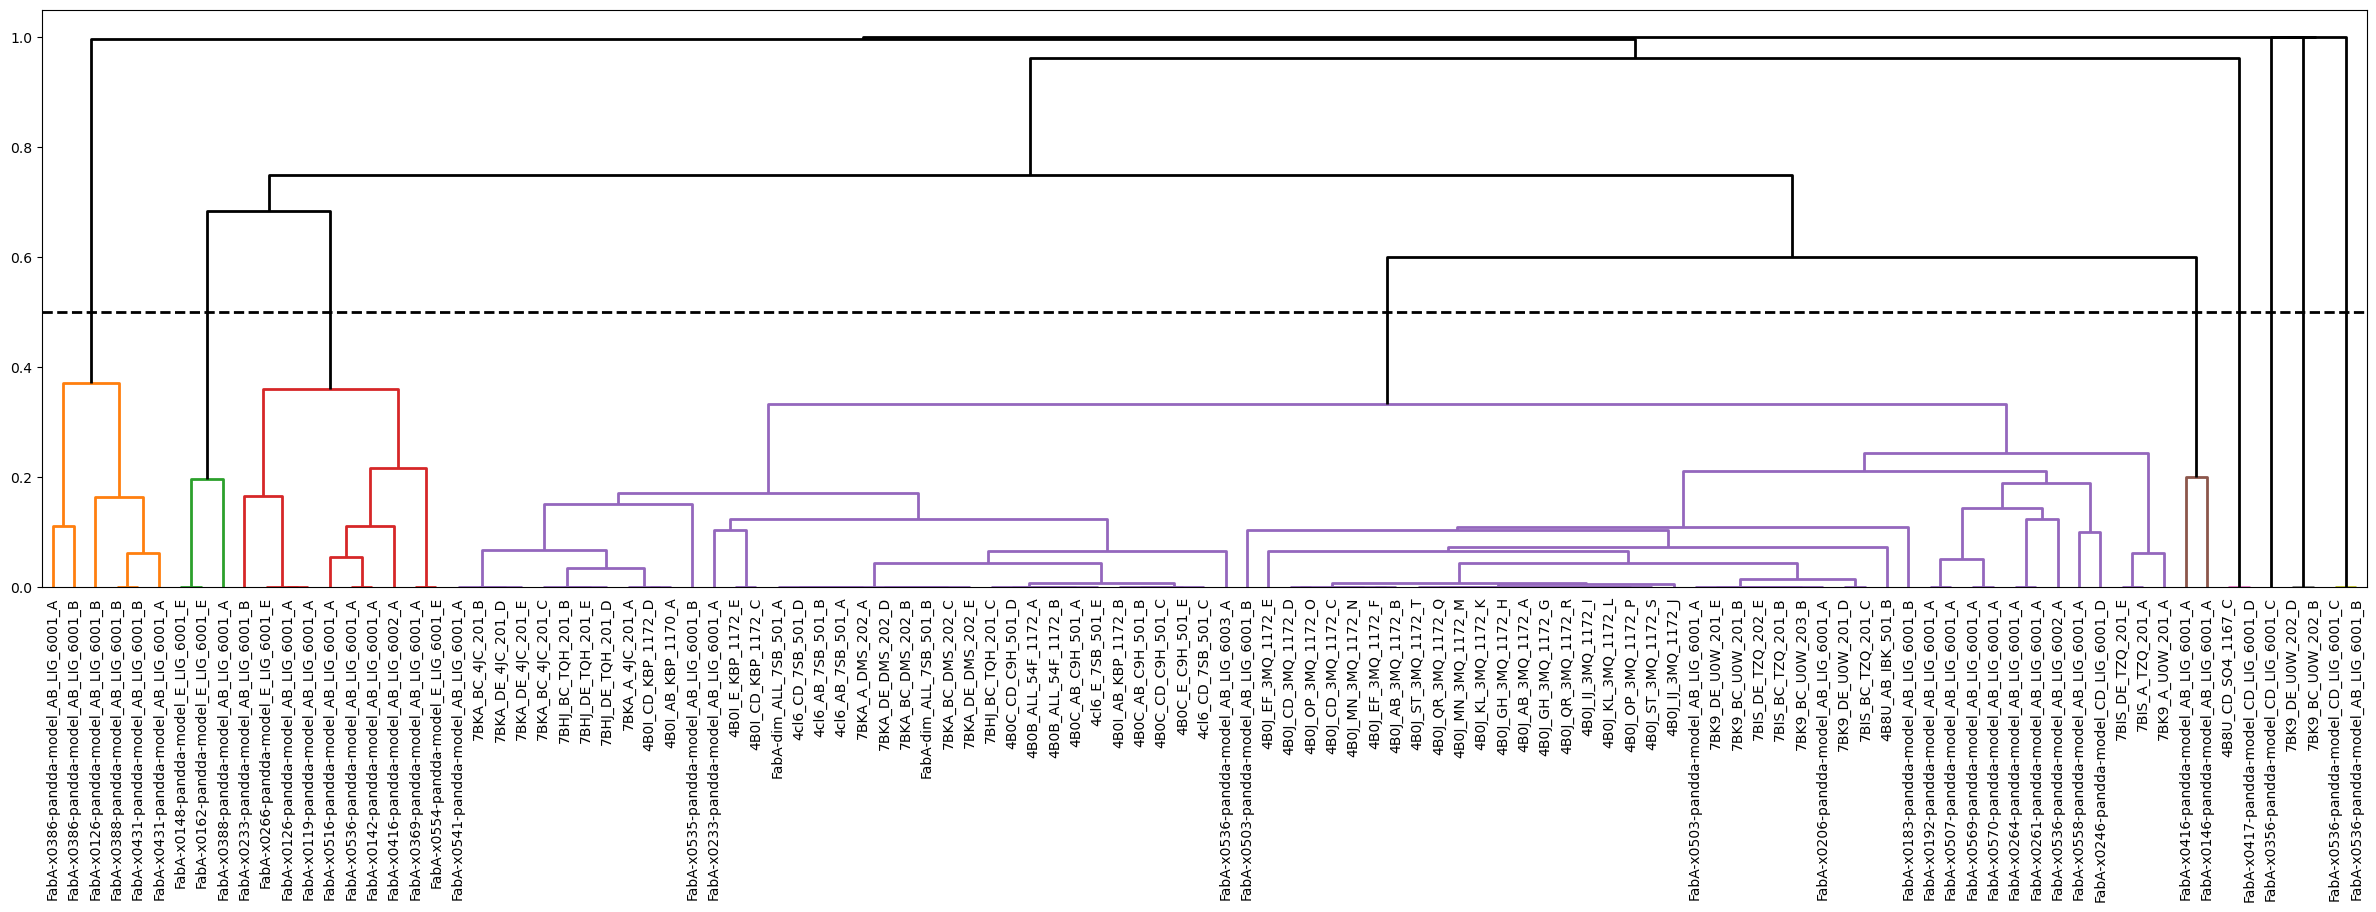

In [20]:
fig = plt.figure(figsize=(30, 7.5), dpi = 100)
matplotlib.rcParams['lines.linewidth'] = 2
dd = scipy.cluster.hierarchy.dendrogram(linkage, labels = labs, leaf_font_size = 10, color_threshold = clust_dist, above_threshold_color = "k")
# = [cluster_id_dict[d] for d in dd["ivl"]]
# = sorted(set(x), key=x.index)
#ols_list = [sample_colors[i] for i in x]
#cipy.cluster.hierarchy.set_link_color_palette(cols_list)

#[site_cluster_dict[k] for k in dd["ivl"]]
#if out != None:
#    plt.savefig(out)
    #print("Figure was successfully saved!")
#plt.ylim(0,20)
plt.axhline(y=clust_dist, c = "k", linestyle = "--")
#plt.ylim(-0.1)
plt.show()

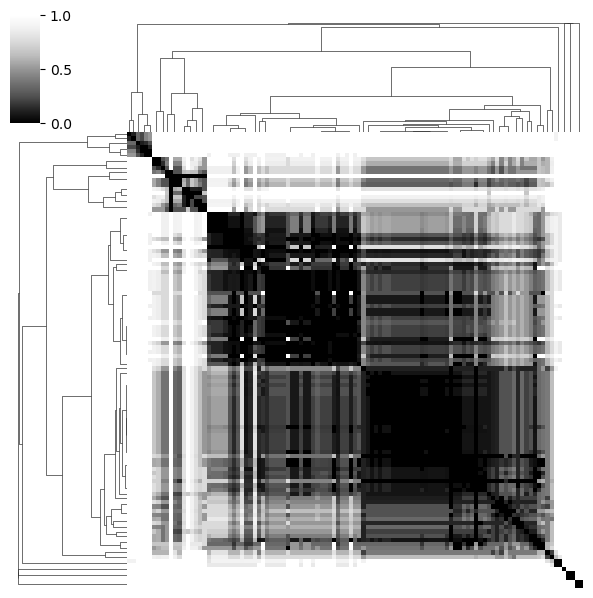

In [21]:
sns.clustermap(rel_dist_df, xticklabels = False, yticklabels = False, row_linkage=linkage, col_linkage=linkage, figsize=(6,6), cmap = "Greys_r")
#plt.savefig('./figs/fig_name.png', dpi = 600)
plt.show()

## Results table analysis

In [22]:
print("Minimum occupancy: {}".format(results_df.occ.min()))
print("Average occupancy: {}".format(round(results_df.occ.mean())))
print("Maximum occupancy: {}".format(results_df.occ.max()))

Minimum occupancy: 149
Average occupancy: 626
Maximum occupancy: 766


In [24]:
#print("Minimum HUMAN occupancy: {}".format(results_df.human_occ.min()))
#print("Average HUMAN occupancy: {}".format(round(results_df.human_occ.mean())))
#print("Maximum HUMAN occupancy: {}".format(results_df.human_occ.max()))

## Conservation & occupancy on target sequence (FULL MSA)

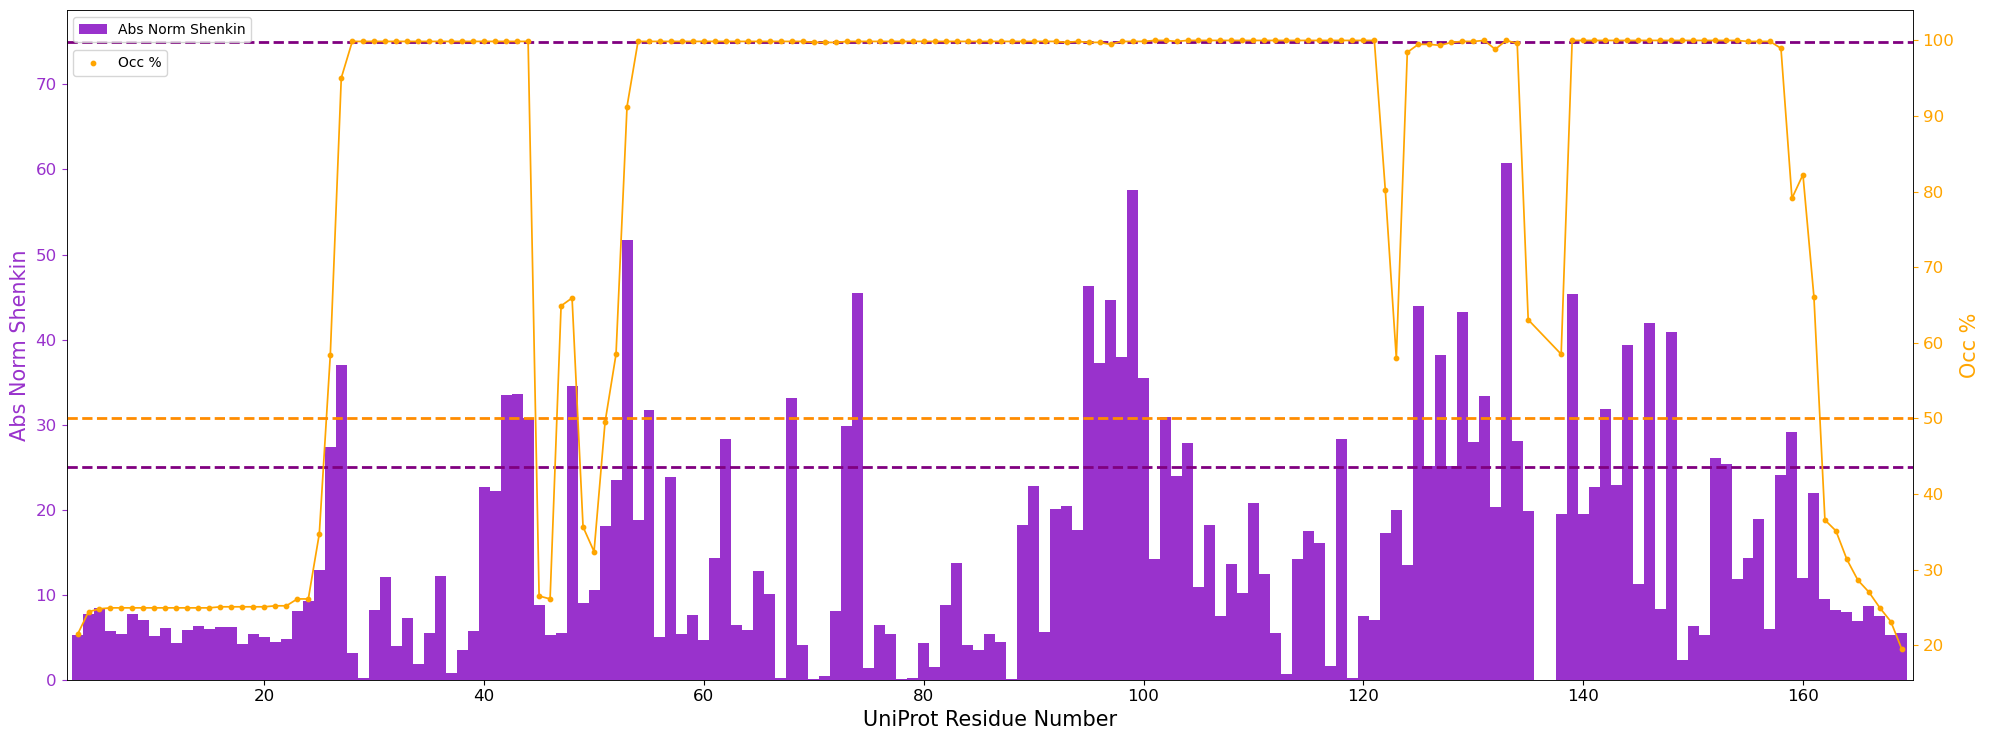

In [25]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['abs_norm_shenkin'], color='darkorchid', label='Abs Norm Shenkin', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Abs Norm Shenkin', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', marker='o', label='Occ %', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ %', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


## Conservation & occupancy on target sequence (HUMAN MSA)

In [27]:
# # Create the figure and the first axis (ax1)

# plt.rcParams.update({"axes.linewidth": 0.5})

# fig, ax1 = plt.subplots(figsize=(20, 7.5))

# # Plot a barplot on ax1
# ax1.bar(results_df['UniProt_ResNum'], results_df['human_shenkin'], color='darkorchid', label='Shenkin (HUMAN)', width = 1)

# # Make the y-axis label, ticks and tick labels match the line color.
# ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
# ax1.set_ylabel('Shenkin (HUMAN)', color='darkorchid', fontsize = 15)
# ax1.tick_params('x', colors='k', labelsize=12)
# ax1.tick_params('y', colors='darkorchid', labelsize=12)
# ax1.axhline(y = 25, linestyle = '--', c = 'purple')
# ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# # Create the second axis (ax2) based on the first axis (ax1)
# ax2 = ax1.twinx()

# # Plot a scatterplot + lineplot on ax2
# ax2.scatter(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', marker='o', label='Occ % (HUMAN)', s = 10)
# ax2.plot(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', linewidth = 1.25)

# # Make the y-axis label, ticks and tick labels match the line color.
# ax2.set_ylabel('Occ % (HUMAN)', color='orange', fontsize = 15)
# ax2.tick_params('y', colors='orange', labelsize=12)
# ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

# plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# # Create legends
# ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
# ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# # Show the plot
# fig.tight_layout()
# plt.show()


### Binding sites analysis

In [28]:
binding_ress_df = results_df.query('binding_sites == binding_sites').copy()

In [29]:
binding_ress_df = binding_ress_df.explode("binding_sites")

In [30]:
un_bss = sorted(binding_ress_df.binding_sites.unique().tolist())

In [31]:
results_df.columns

Index(['UniProt_ResNum', 'alignment_column', 'shenkin', 'occ', 'gaps',
       'occ_pct', 'gaps_pct', 'rel_norm_shenkin', 'abs_norm_shenkin', 'AA',
       'RSA', 'SS', 'binding_sites'],
      dtype='object')

In [33]:
sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs = [[], [], [], [], [], [], []]
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sizes.append(len(bs_df))
    occs.append(bs_df.occ_pct.mean())
    shenks.append(bs_df.abs_norm_shenkin.mean())
    #hum_occs.append(bs_df.human_occ_pct.mean())
    #hum_shenks.append(bs_df.human_shenkin.mean())
    #ORs.append(bs_df.oddsratio.mean())
    RSAs.append(bs_df.RSA.mean())

bss_df = pd.DataFrame(
    zip(
        un_bss, sizes, occs, shenks,
        #hum_occs, hum_shenks, ORs,
        RSAs),
    columns=[
        "bs_id", "size", "occ_pct", "abs_norm_shenk",
        #"human_occ_pct", "human_shenk", "OR",
        "RSA"
    ]
).round(2)
bss_df["color"] = bss_df.bs_id.map(sample_colors_dict)

In [34]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,RSA,color
0,0,38,84.05,10.59,19.74,#e6194b
1,1,10,62.21,18.35,41.96,#3cb44b
2,2,5,44.99,12.97,47.91,#ffe119
3,3,16,89.52,14.61,24.99,#4363d8
4,4,14,52.12,17.38,32.10,#f58231
5,5,9,62.78,19.11,37.31,#911eb4
6,6,8,66.20,11.21,35.00,#46f0f0
7,7,5,99.87,13.24,41.53,#f032e6
8,8,6,74.87,21.03,30.74,#bcf60c


### Average Missense enrichment vs divergence per site

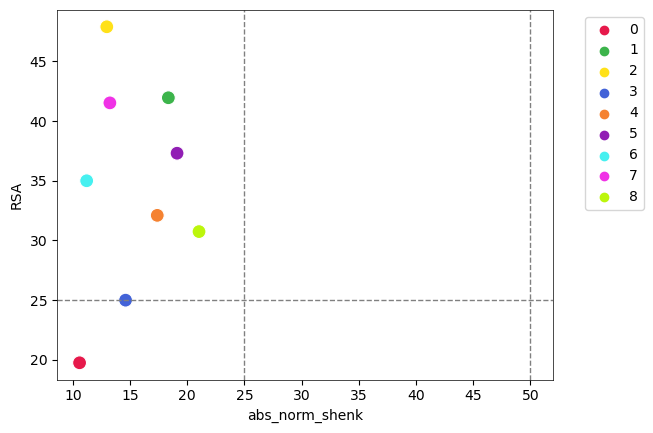

In [36]:
sns.scatterplot(
    data = bss_df,
    x = "abs_norm_shenk",
    y = "RSA",
    hue = "bs_id",
    palette = bss_df["color"].tolist(),
    s = 100
)
#plt.yscale('log')
plt.axhline(y=25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [38]:
print(binding_ress_df.abs_norm_shenkin.min())
print(binding_ress_df.abs_norm_shenkin.max())

0.05
46.26


### Inspecting binding site ligand membership

In [39]:
bs_ligs_dict = {bs_id: sorted(bs_rows.lig_name.tolist()) for bs_id, bs_rows in bs_def_df.groupby("binding_site")}

In [40]:
for k, v in bs_ligs_dict.items():
    print("{}: {}".format(k, v))

0: ['3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '3MQ', '4JC', '4JC', '4JC', '4JC', '4JC', '54F', '54F', '7SB', '7SB', '7SB', '7SB', '7SB', '7SB', '7SB', 'C9H', 'C9H', 'C9H', 'C9H', 'C9H', 'DMS', 'DMS', 'DMS', 'DMS', 'DMS', 'IBK', 'KBP', 'KBP', 'KBP', 'KBP', 'KBP', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'TQH', 'TQH', 'TQH', 'TQH', 'TZQ', 'TZQ', 'TZQ', 'TZQ', 'TZQ', 'U0W', 'U0W', 'U0W', 'U0W', 'U0W']
1: ['LIG', 'SO4']
2: ['U0W', 'U0W']
3: ['LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG']
4: ['LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG']
5: ['LIG', 'LIG']
6: ['LIG', 'LIG', 'LIG']
7: ['LIG']
8: ['LIG', 'LIG']


### Plotting Missense enrichment vs Divergence for each site

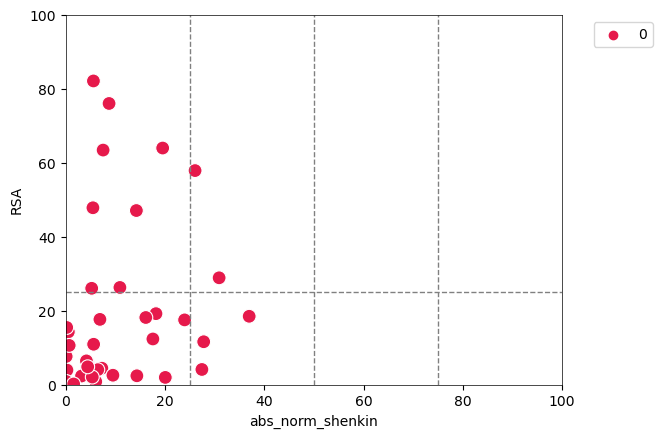

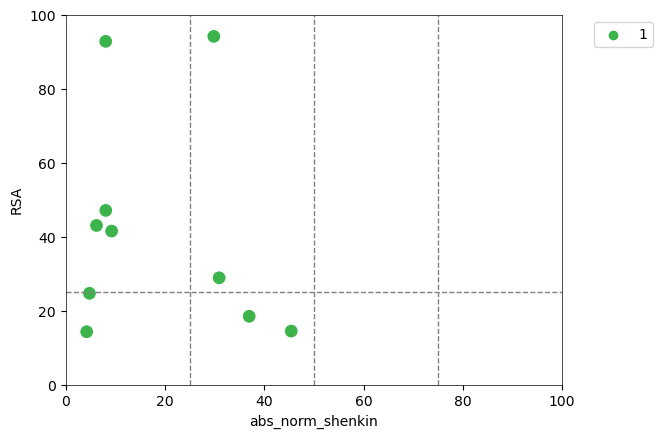

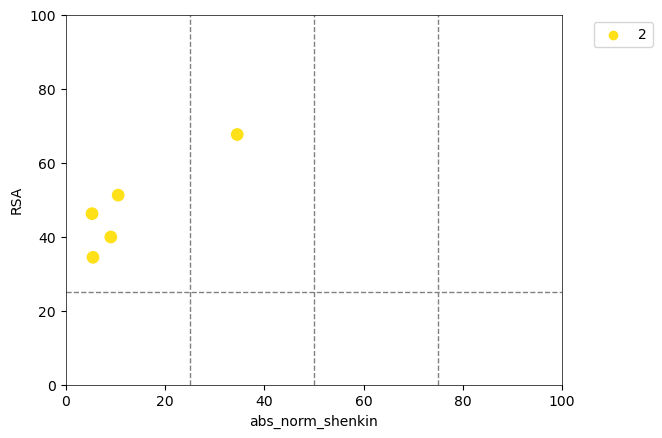

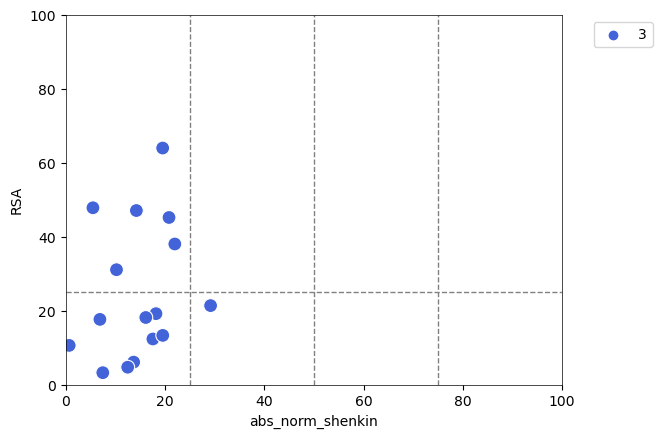

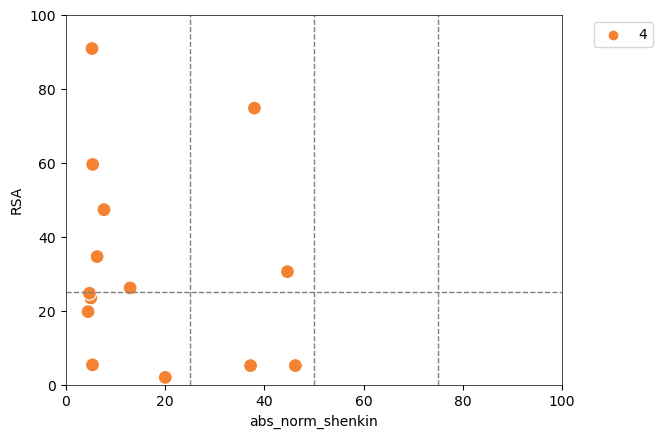

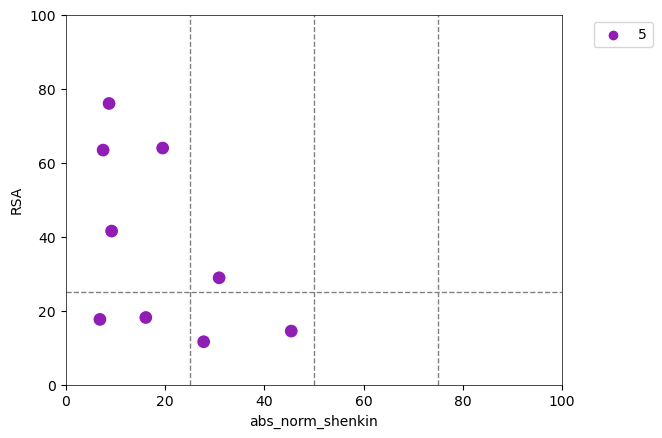

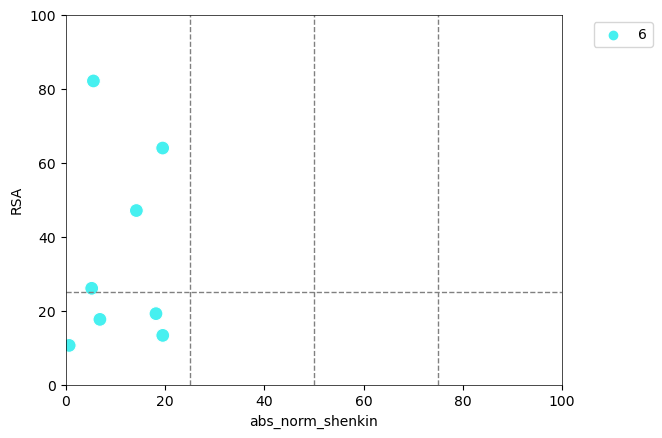

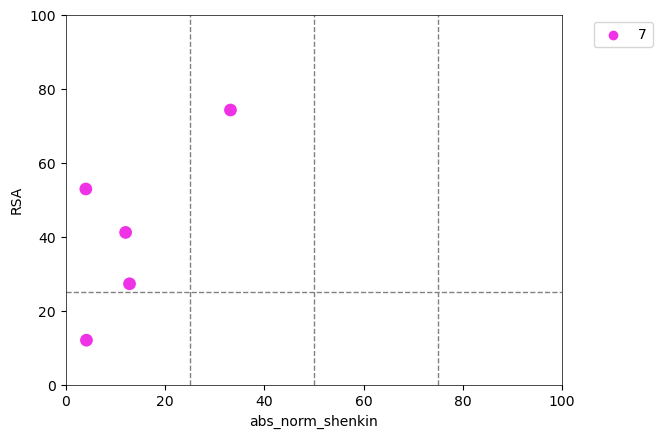

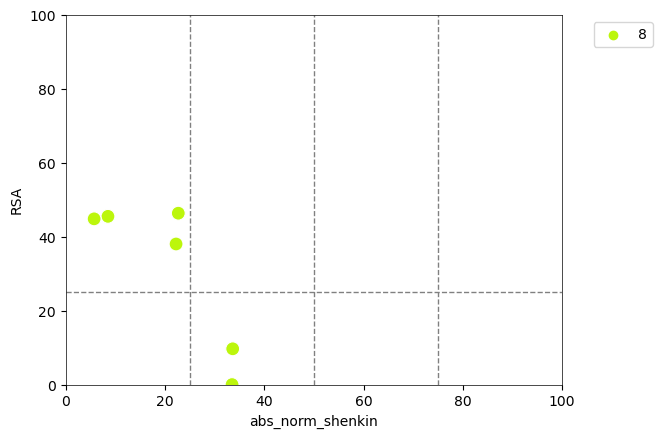

In [41]:
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sns.scatterplot(
        data = bs_df,
        x = "abs_norm_shenkin",
        y = "RSA",
        hue = "binding_sites",
        palette = [sample_colors[bs]],
        s = 100
    )
    #print([sample_colors[bs] for i in range(len(bs_df))])
    #plt.yscale('log')
    plt.axhline(y=25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 75, linestyle = "--", lw = 1, c = "gray")
    
    plt.xlim(0,100)
    plt.ylim(0,100)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

## FUNCTIONAL SCORE PER SITE

In [42]:
rsa_profs_dict

{0: [0.8,
  4.09,
  18.48,
  2.32,
  3.93,
  4.43,
  9.89,
  14.26,
  4.03,
  2.04,
  0.85,
  15.45,
  6.02,
  6.41,
  4.81,
  7.62,
  10.91,
  1.94,
  28.89,
  17.5,
  11.59,
  26.28,
  19.19,
  47.84,
  10.6,
  47.09,
  12.34,
  18.15,
  0.16,
  64.0,
  57.9,
  2.38,
  2.53,
  17.64,
  76.06,
  63.45,
  26.05,
  82.15,
  77.09,
  38.57],
 1: [43.05, 14.3, 24.7, 92.86, 41.54, 18.48, 47.12, 94.21, 14.48, 28.89],
 2: [46.24, 34.44, 67.67, 39.93, 51.26],
 3: [19.19,
  3.22,
  6.08,
  31.08,
  45.21,
  4.7,
  47.84,
  10.6,
  47.09,
  12.34,
  18.15,
  64.0,
  13.31,
  21.37,
  38.04,
  17.64,
  77.09,
  38.57],
 4: [50.97,
  90.92,
  47.32,
  5.34,
  34.63,
  59.57,
  23.42,
  19.73,
  24.7,
  26.15,
  1.94,
  5.14,
  5.13,
  30.55,
  74.79],
 5: [41.54, 14.48, 28.89, 11.59, 18.15, 64.0, 17.64, 76.06, 63.45],
 6: [19.19,
  10.6,
  47.09,
  85.91,
  64.0,
  13.31,
  17.64,
  26.05,
  82.15,
  77.09,
  38.57],
 7: [41.17, 52.92, 27.27, 74.29, 12.01],
 8: [45.52, 44.84, 46.37, 38.04, 0.0, 9

In [43]:
max_len = max([len(v) for v in rsa_profs_dict.values()])
bs_vectors = []
bs_vectors_dict = {}
for bs_id, rsa_sig in rsa_profs_dict.items():
    rsa_sig_len = len(rsa_sig)
    rsa_range_prop = [0 for i in range(10)] # now let us change to 10
    for rsa in rsa_sig:
        prop_i = int(rsa/10) # 10 RSA BINS: b1 = [0,10), b2 = [10, 20), ... b10 = [90, MAX)
        if prop_i > 9: # if greater than 100, put in 10th bin
            prop_i = 9
        #print(prop_i)
        rsa_range_prop[prop_i] += 1
    rsa_range_prop = [round(i/rsa_sig_len, 3) for i in rsa_range_prop]
    rsa_range_prop.insert(0, rsa_sig_len/max_len) # ADDING BINDING SITE SIZE RELATIVE TO MAX SITE SIZE (IN THIS CASE 40)
    bs_vectors.append(rsa_range_prop)
    bs_vectors_dict[bs_id] = rsa_range_prop
    
vector_df = pd.DataFrame(bs_vectors, index = list(rsa_profs_dict.keys())) # obtaining RSA vectors, which are the 11-element features used for the machine learning

In [44]:
vector_df

,0,1,2,3,4,5,6,7,8,9,10
0,1.000,0.425,0.275,0.075,0.025,0.050,0.025,0.050,0.050,0.025,0.000
1,0.250,0.000,0.300,0.200,0.000,0.300,0.000,0.000,0.000,0.000,0.200
2,0.125,0.000,0.000,0.000,0.400,0.200,0.200,0.200,0.000,0.000,0.000
3,0.450,0.167,0.333,0.056,0.167,0.167,0.000,0.056,0.056,0.000,0.000
4,0.375,0.267,0.067,0.200,0.133,0.067,0.133,0.000,0.067,0.000,0.067
5,0.225,0.000,0.444,0.111,0.000,0.111,0.000,0.222,0.111,0.000,0.000
6,0.275,0.000,0.364,0.091,0.091,0.091,0.000,0.091,0.091,0.182,0.000
7,0.125,0.000,0.200,0.200,0.000,0.200,0.200,0.000,0.200,0.000,0.000
8,0.150,0.333,0.000,0.000,0.167,0.500,0.000,0.000,0.000,0.000,0.000


In [45]:
import keras

2023-09-11 17:26:34.046399: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model_path = "/homes/2394007/JSU_LIGYSIS/ANN_results/diff_seeds/85406/models/85406_4_model_epoch_75_train_acc_0.88.h5"
final_model = keras.models.load_model(model_path)
final_preds = final_model.predict(x = vector_df, batch_size = 27, verbose = 0)
rounded_predictions = np.argmax(final_preds, axis = -1)

2023-09-11 17:26:36.888924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
prop_func_dict = {0:0.58, 1: 0.18, 2:0.05, 3:0.04}

In [48]:
site_func_score_dict = {}
for i, el in enumerate(final_preds):
    site_func_score_dict[i] = 0
    for o, e in enumerate(el):
        site_func_score_dict[i] += e*prop_func_dict[o]
    #print([round(e,6) for e in el])
    
site_func_score_dict = {k: round(v, 4) for k, v in site_func_score_dict.items()}

In [49]:
site_func_score_dict

{0: 0.5789,
 1: 0.1747,
 2: 0.0528,
 3: 0.4141,
 4: 0.2023,
 5: 0.1747,
 6: 0.1446,
 7: 0.0745,
 8: 0.2116}

In [50]:
bss_df["rsa_cluster"] = [el + 1 for el in list(rounded_predictions)]
bss_df["func_score"] = bss_df.bs_id.map(site_func_score_dict)

In [51]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,RSA,color,rsa_cluster,func_score
0,0,38,84.05,10.59,19.74,#e6194b,1,0.5789
1,1,10,62.21,18.35,41.96,#3cb44b,2,0.1747
2,2,5,44.99,12.97,47.91,#ffe119,3,0.0528
3,3,16,89.52,14.61,24.99,#4363d8,1,0.4141
4,4,14,52.12,17.38,32.10,#f58231,2,0.2023
5,5,9,62.78,19.11,37.31,#911eb4,2,0.1747
6,6,8,66.20,11.21,35.00,#46f0f0,2,0.1446
7,7,5,99.87,13.24,41.53,#f032e6,3,0.0745
8,8,6,74.87,21.03,30.74,#bcf60c,2,0.2116
